In [1]:
#Import packages

import numpy as np
import pandas as pd
import geopandas as gpd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings('ignore')

## Working With Building Permits Data

In [2]:


url = 'https://opendata.vancouver.ca/api/v2/catalog/datasets/issued-building-permits/exports/geojson?limit=-1&offset=0&timezone=UTC'
data = requests.get(url)
permits_df = gpd.GeoDataFrame().from_features(data.json())
permits_df = permits_df.set_crs('EPSG:4326').to_crs('EPSG:3857') # Set all geopandas dataframes to the same coordinate reference system

In [3]:
permits_df.head()

,geometry,permitnumber,permitnumbercreateddate,issuedate,permitelapseddays,projectvalue,typeofwork,address,projectdescription,permitcategory,...,applicantaddress,propertyuse,specificusecategory,buildingcontractor,buildingcontractoraddress,issueyear,geolocalarea,yearmonth,geo_point_2d,geom
0,POINT (-13699502.789 6321885.570),BP-2021-03669,2021-07-15,2021-07-26,11,0.0,Salvage and Abatement,"1938 VENABLES STREET, Vancouver, BC V5L 2H8",Low Density Housing - Salvage and Abatement - ...,None,...,"13564 67 Ave\r\nSurrey, BC V3W2B8",[Dwelling Uses],[Single Detached House],SOURCE ONE EXCAVATING LTD,None,2021,Grandview-Woodland,2021-07,"{'lon': -123.0647274, 'lat': 49.2763653}",NaN
1,POINT (-13697280.073 6315668.465),BP-2016-04179,2016-12-06,2017-10-04,302,15000.0,Demolition / Deconstruction,"4950 MOSS STREET, Vancouver, BC V5R 3T4",Low Density Housing - Demolition / Deconstruct...,None,...,"17055 - 60th Avenue\r\nSurrey, BC V3S 1T3",[Dwelling Uses],[Duplex],SOURCE ONE EXCAVATING LTD,None,2017,Renfrew-Collingwood,2017-10,"{'lon': -123.0447604, 'lat': 49.2399152}",NaN
2,POINT (-13705506.060 6321760.620),BP-2017-04112,2017-08-04,2017-09-05,32,15000.0,Addition / Alteration,"1011 CAMBIE STREET, Vancouver, BC V6B 5L7",Field Review - Addition / Alteration - 1011 Ca...,Renovation - Commercial/ Mixed Use - Lower Com...,...,"105 - 2544 Douglas Rd\r\nBurnaby, BC V5C 5W7",[Service Uses],[School - Arts or Self-Improvement],Gibraltar Holdings,None,2017,Downtown,2017-09,"{'lon': -123.1186557, 'lat': 49.275633}",NaN
3,POINT (-13705804.808 6323067.917),BP-2017-01959,2017-04-13,2017-04-26,13,18000.0,Addition / Alteration,"777 HORNBY STREET, Vancouver, BC V6Z 1S4",Field Review - Addition / Alteration - Unit #9...,Renovation - Commercial/ Mixed Use - Lower Com...,...,"105 - 2544 Douglas Rd\r\nBurnaby, BC V5C 5W7",[Office Uses],[General Office],Gibraltar Holdings,None,2017,Downtown,2017-04,"{'lon': -123.1213394, 'lat': 49.2832942}",NaN
4,POINT (-13705168.584 6323326.253),BP-2017-02645,2017-05-16,2017-06-12,27,15000.0,Addition / Alteration,"750 W PENDER STREET, Vancouver, BC V6C 2T7",Field Review - Addition / Alteration - #720-7t...,Renovation - Commercial/ Mixed Use - Lower Com...,...,"105 - 2544 Douglas Rd\r\nBurnaby, BC V5C 5W7",[Office Uses],[General Office],Gibraltar Holdings,None,2017,Downtown,2017-06,"{'lon': -123.1156241, 'lat': 49.284808}",NaN


### Data Cleaning & Preparation

In [4]:
#Check data types

permits_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33987 entries, 0 to 33986
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   geometry                   33643 non-null  geometry
 1   permitnumber               33987 non-null  object  
 2   permitnumbercreateddate    33987 non-null  object  
 3   issuedate                  33987 non-null  object  
 4   permitelapseddays          33987 non-null  int64   
 5   projectvalue               33987 non-null  float64 
 6   typeofwork                 33987 non-null  object  
 7   address                    33922 non-null  object  
 8   projectdescription         33987 non-null  object  
 9   permitcategory             19386 non-null  object  
 10  applicant                  33987 non-null  object  
 11  applicantaddress           33901 non-null  object  
 12  propertyuse                33982 non-null  object  
 13  specificusecategory    

In [5]:
#Remove unnecessary columns

cols_to_keep = ['geometry','projectvalue','typeofwork','propertyuse','issueyear','geolocalarea']

permits_df = permits_df[cols_to_keep]

permits_df.head()

,geometry,projectvalue,typeofwork,propertyuse,issueyear,geolocalarea
0,POINT (-13699502.789 6321885.570),0.0,Salvage and Abatement,[Dwelling Uses],2021,Grandview-Woodland
1,POINT (-13697280.073 6315668.465),15000.0,Demolition / Deconstruction,[Dwelling Uses],2017,Renfrew-Collingwood
2,POINT (-13705506.060 6321760.620),15000.0,Addition / Alteration,[Service Uses],2017,Downtown
3,POINT (-13705804.808 6323067.917),18000.0,Addition / Alteration,[Office Uses],2017,Downtown
4,POINT (-13705168.584 6323326.253),15000.0,Addition / Alteration,[Office Uses],2017,Downtown


In [6]:
#Rename columns to more appropriate names

new_columns = {'projectvalue':'ProjectValue',
               'typeofwork':'WorkType',
               'propertyuse':'PropertyUse',
               'issueyear':'Year',
               'geolocalarea':'Area'
               }

permits_df.rename(columns=new_columns, inplace=True)

In [7]:
permits_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33987 entries, 0 to 33986
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   geometry      33643 non-null  geometry
 1   ProjectValue  33987 non-null  float64 
 2   WorkType      33987 non-null  object  
 3   PropertyUse   33982 non-null  object  
 4   Year          33987 non-null  object  
 5   Area          33636 non-null  object  
dtypes: float64(1), geometry(1), object(4)
memory usage: 1.6+ MB


In [8]:
#Convert year column to integer

permits_df['Year'] = permits_df['Year'].astype(str).astype(int)
permits_df.dtypes

geometry        geometry
ProjectValue     float64
WorkType          object
PropertyUse       object
Year               int32
Area              object
dtype: object

In [9]:
permits_df.head()

,geometry,ProjectValue,WorkType,PropertyUse,Year,Area
0,POINT (-13699502.789 6321885.570),0.0,Salvage and Abatement,[Dwelling Uses],2021,Grandview-Woodland
1,POINT (-13697280.073 6315668.465),15000.0,Demolition / Deconstruction,[Dwelling Uses],2017,Renfrew-Collingwood
2,POINT (-13705506.060 6321760.620),15000.0,Addition / Alteration,[Service Uses],2017,Downtown
3,POINT (-13705804.808 6323067.917),18000.0,Addition / Alteration,[Office Uses],2017,Downtown
4,POINT (-13705168.584 6323326.253),15000.0,Addition / Alteration,[Office Uses],2017,Downtown


#### Data Cleaning & Preparation - Property Use

In [10]:
#Check value counts for property use

permits_df.PropertyUse.value_counts()

[Dwelling Uses]                                                                             23877
[Office Uses]                                                                                4218
[Retail Uses]                                                                                1686
[Service Uses]                                                                               1337
[Institutional Uses]                                                                          668
                                                                                            ...  
[Office Uses, Parking Uses, Service Uses, Wholesale Uses]                                       1
[Cultural/Recreational Uses, Institutional Uses, Office Uses, Parking Uses, Retail Uses]        1
[Cultural/Recreational Uses, Dwelling Uses, Retail Uses]                                        1
[Cultural/Recreational Uses, Parking Uses]                                                      1
[Institutional Uses,

In [11]:
# Create a number of uses column by counting the number of items in the property use column which is a list of values

permits_df["NumberOfUses"] = permits_df.PropertyUse.str.len()

#Remove the rows where the number of uses is blank

permits_df = permits_df[permits_df['NumberOfUses'].notna()]

#Convert number of uses to an integer

permits_df["NumberOfUses"] = permits_df["NumberOfUses"].astype(int)

In [12]:
permits_df.NumberOfUses.value_counts()

1    32989
2      734
3      186
4       57
5       16
Name: NumberOfUses, dtype: int64

In [13]:
#Create a new revised property use column that converts the original column from a list of values into a string of values

permits_df['PropertyUseRevised'] = permits_df.PropertyUse.apply(lambda x: ', '.join([str(i) for i in x]))

permits_df.head()

,geometry,ProjectValue,WorkType,PropertyUse,Year,Area,NumberOfUses,PropertyUseRevised
0,POINT (-13699502.789 6321885.570),0.0,Salvage and Abatement,[Dwelling Uses],2021,Grandview-Woodland,1,Dwelling Uses
1,POINT (-13697280.073 6315668.465),15000.0,Demolition / Deconstruction,[Dwelling Uses],2017,Renfrew-Collingwood,1,Dwelling Uses
2,POINT (-13705506.060 6321760.620),15000.0,Addition / Alteration,[Service Uses],2017,Downtown,1,Service Uses
3,POINT (-13705804.808 6323067.917),18000.0,Addition / Alteration,[Office Uses],2017,Downtown,1,Office Uses
4,POINT (-13705168.584 6323326.253),15000.0,Addition / Alteration,[Office Uses],2017,Downtown,1,Office Uses


In [14]:
#Change property use revised column base on the number of uses column. If the number of uses is greater than 1, change the value of property use revised to mixed use, otherwise keep it the same.

permits_df['PropertyUseRevised'] = np.where(permits_df.NumberOfUses > 1, 'Mixed Uses', permits_df.PropertyUseRevised)

In [15]:
permits_df.PropertyUseRevised.value_counts()

Dwelling Uses                      23877
Office Uses                         4218
Retail Uses                         1686
Service Uses                        1337
Mixed Uses                           993
Institutional Uses                   668
Cultural/Recreational Uses           542
Manufacturing Uses                   250
Wholesale Uses                       126
Transportation and Storage Uses      112
Parking Uses                          93
Utility and Communication Uses        56
Live-Work Uses                        19
Agricultural Uses                      3
Mural                                  1
Deposition or Extraction Uses          1
Name: PropertyUseRevised, dtype: int64

In [16]:
#Remove number of uses and original property use columns now that they are redundant

permits_df = permits_df[['geometry','ProjectValue','WorkType','Year','Area','PropertyUseRevised']]

permits_df.head()

,geometry,ProjectValue,WorkType,Year,Area,PropertyUseRevised
0,POINT (-13699502.789 6321885.570),0.0,Salvage and Abatement,2021,Grandview-Woodland,Dwelling Uses
1,POINT (-13697280.073 6315668.465),15000.0,Demolition / Deconstruction,2017,Renfrew-Collingwood,Dwelling Uses
2,POINT (-13705506.060 6321760.620),15000.0,Addition / Alteration,2017,Downtown,Service Uses
3,POINT (-13705804.808 6323067.917),18000.0,Addition / Alteration,2017,Downtown,Office Uses
4,POINT (-13705168.584 6323326.253),15000.0,Addition / Alteration,2017,Downtown,Office Uses


#### Data Cleaning & Preparation - Work Type

In [17]:
permits_df.WorkType.value_counts()

Addition / Alteration                   16485
New Building                             7752
Salvage and Abatement                    4901
Demolition / Deconstruction              4479
Temporary Building / Structure            320
Outdoor Uses (No Buildings Proposed)       45
Name: WorkType, dtype: int64

In [18]:
#Rename some of the values in the work type field

permits_df['WorkType'] = permits_df['WorkType'].replace({'Addition / Alteration':'Addition',
                                                         'Salvage and Abatement':'Salvage',
                                                         'Demolition / Deconstruction':'Demolition',
                                                         'Temporary Building / Structure':'Temporary Building',
                                                         'Outdoor Uses (No Buildings Proposed)':'Outdoor Use'
                                                         })

permits_df.WorkType.value_counts()

Addition              16485
New Building           7752
Salvage                4901
Demolition             4479
Temporary Building      320
Outdoor Use              45
Name: WorkType, dtype: int64

#### Data Cleaning & Preparation - Year

In [19]:
permits_df.Year.value_counts()

2018    6758
2017    6729
2019    5572
2022    5481
2021    5052
2020    4390
Name: Year, dtype: int64

In [20]:
#Filter the data down to permits that were submitted between the years 2017 and 2019.

permits_df = permits_df[permits_df['Year'].between(2017, 2019)]
permits_df.Year.value_counts()

2018    6758
2017    6729
2019    5572
Name: Year, dtype: int64

### Check For Missing Values

In [21]:
#Check the number of null values in each column

total_missing = permits_df.isnull().sum().sort_values(ascending=False)
percent = (permits_df.isnull().sum()/permits_df.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total_missing, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data.head()

,Total Missing,Percent
Area,151,0.792277
geometry,147,0.771289
ProjectValue,0,0.000000
WorkType,0,0.000000
Year,0,0.000000


In [22]:
#Since there is such a small amount of missing data, drop the rows where there are missing values

permits_df = permits_df.dropna()
permits_df.isnull().sum()

geometry              0
ProjectValue          0
WorkType              0
Year                  0
Area                  0
PropertyUseRevised    0
dtype: int64

# Working With Other Geospatial Datasets

In [23]:
# A function that drops all of the columns in a geopandas dataframe except for the geometry column. This is used on the datasets where you want to return a boolean value.

def geo_column_only(url, col_name):
    r = requests.get(url)
    gdf = gpd.GeoDataFrame().from_features(r.json())
    gdf = gdf.set_crs('EPSG:4326').to_crs('EPSG:3857') #Sets the CRS to the same as the permits data set
    final_table_columns = ['geometry']
    geo_df_with_cols_removed = gdf.drop(columns=[col for col in gdf if col not in final_table_columns]) #Drop a column if its not geometry
    geo_df_with_cols_removed[col_name] = 1 #Assign a value of 1 to the newly created column
    return geo_df_with_cols_removed

#Function to perform a left spatial join on two geopanadas dataframes and drop the right_index column after the join has been performed

def join_reducer(left, right):
    sjoin = gpd.sjoin(left, right, how='left')
    sjoin.drop('index_right', axis=1, inplace=True)
    return sjoin

## Business Improvement Areas

In [24]:
bia_df = geo_column_only('https://opendata.vancouver.ca/api/v2/catalog/datasets/business-improvement-areas-bia/exports/geojson?limit=-1&offset=0&timezone=UTC', 'BusinessImprovementArea')
bia_df.head()

,geometry,BusinessImprovementArea
0,"POLYGON ((-13700143.889 6321936.969, -13700128...",1
1,"MULTIPOLYGON (((-13695742.940 6322624.315, -13...",1
2,"POLYGON ((-13709782.421 6314843.080, -13709781...",1
3,"POLYGON ((-13707842.306 6311277.467, -13707919...",1
4,"POLYGON ((-13707708.568 6320234.155, -13707788...",1


In [25]:
#Spatial join BIA data to the permits data. If a permit is located within a BIA it will be labeled as 1, otherwise it will be labeled as 0.

permits_df = join_reducer(permits_df,bia_df)
permits_df['BusinessImprovementArea'].fillna(0, inplace = True) #Where a permit is not located in a BIA assign it a value of zero
permits_df.head()

,geometry,ProjectValue,WorkType,Year,Area,PropertyUseRevised,BusinessImprovementArea
1,POINT (-13697280.073 6315668.465),15000.0,Demolition,2017,Renfrew-Collingwood,Dwelling Uses,0.0
2,POINT (-13705506.060 6321760.620),15000.0,Addition,2017,Downtown,Service Uses,1.0
3,POINT (-13705804.808 6323067.917),18000.0,Addition,2017,Downtown,Office Uses,1.0
4,POINT (-13705168.584 6323326.253),15000.0,Addition,2017,Downtown,Office Uses,1.0
5,POINT (-13705404.792 6323085.374),30000.0,Addition,2017,Downtown,Office Uses,1.0


In [26]:
permits_df.BusinessImprovementArea.value_counts()

0.0    14762
1.0     4146
Name: BusinessImprovementArea, dtype: int64

## Flood Plain Areas

In [27]:
fp_df = geo_column_only('https://opendata.vancouver.ca/api/v2/catalog/datasets/designated-floodplain/exports/geojson?limit=-1&offset=0&timezone=UTC','FloodPlain')
fp_df.head()

,geometry,FloodPlain
0,"POLYGON ((-13695468.072 6319454.037, -13695467...",1
1,"POLYGON ((-13696427.537 6318776.760, -13696642...",1
2,"POLYGON ((-13695858.168 6319254.615, -13695858...",1
3,"POLYGON ((-13695468.072 6319454.037, -13695468...",1
4,"MULTIPOLYGON (((-13711762.162 6321091.018, -13...",1


In [28]:
permits_df = join_reducer(permits_df,fp_df)
permits_df['FloodPlain'].fillna(0, inplace = True) #Where a permit is not located in a flood plain assign it a value of zero
permits_df.head()

,geometry,ProjectValue,WorkType,Year,Area,PropertyUseRevised,BusinessImprovementArea,FloodPlain
1,POINT (-13697280.073 6315668.465),15000.0,Demolition,2017,Renfrew-Collingwood,Dwelling Uses,0.0,0.0
2,POINT (-13705506.060 6321760.620),15000.0,Addition,2017,Downtown,Service Uses,1.0,0.0
3,POINT (-13705804.808 6323067.917),18000.0,Addition,2017,Downtown,Office Uses,1.0,0.0
4,POINT (-13705168.584 6323326.253),15000.0,Addition,2017,Downtown,Office Uses,1.0,0.0
5,POINT (-13705404.792 6323085.374),30000.0,Addition,2017,Downtown,Office Uses,1.0,0.0


In [29]:
permits_df.FloodPlain.value_counts()

0.0    18457
1.0      451
Name: FloodPlain, dtype: int64

## Transit Stations

In [30]:
transit_url = 'https://opendata.vancouver.ca/api/v2/catalog/datasets/rapid-transit-stations/exports/geojson?limit=-1&offset=0&timezone=UTC'
transit_data = requests.get(transit_url)
transit_df = gpd.GeoDataFrame().from_features(transit_data.json())
transit_df = transit_df.set_crs('EPSG:4326').to_crs('EPSG:3857')
transit_df.head()

,geometry,station,geo_local_area
0,POINT (-13705329.627 6310492.370),MARINE DRIVE,Marpole
1,POINT (-13701087.405 6320080.163),VCC - CLARK,Strathcona
2,POINT (-13698516.956 6317093.472),NANAIMO,Renfrew-Collingwood
3,POINT (-13703496.877 6321341.731),MAIN ST. - SCIENCE WORLD,Downtown
4,POINT (-13704494.065 6322410.505),STADIUM - CHINATOWN,Downtown


In [31]:
#Perform a nearest spatial join to calculate the distance between each permit and the nearest transit station in meters
permits_df = permits_df.sjoin_nearest(transit_df, how = 'left', distance_col='DistanceToNearestTransitStation')

#Remove unnecessary columns after calculating distance to nearest transit station via spatial join
cols_to_keep_final = ['geometry','ProjectValue','WorkType','Area','PropertyUseRevised','BusinessImprovementArea','FloodPlain','DistanceToNearestTransitStation']
permits_df = permits_df[cols_to_keep_final]

permits_df.head()

,geometry,ProjectValue,WorkType,Area,PropertyUseRevised,BusinessImprovementArea,FloodPlain,DistanceToNearestTransitStation
1,POINT (-13697280.073 6315668.465),15000.0,Demolition,Renfrew-Collingwood,Dwelling Uses,0.0,0.0,749.467343
2,POINT (-13705506.060 6321760.620),15000.0,Addition,Downtown,Service Uses,1.0,0.0,420.321005
3,POINT (-13705804.808 6323067.917),18000.0,Addition,Downtown,Office Uses,1.0,0.0,350.956936
4,POINT (-13705168.584 6323326.253),15000.0,Addition,Downtown,Office Uses,1.0,0.0,217.774912
5,POINT (-13705404.792 6323085.374),30000.0,Addition,Downtown,Office Uses,1.0,0.0,154.954043


## Exploratory Data Analysis

Analyzing Categorical Features

In [32]:
cat_cols = ['WorkType','Area','PropertyUseRevised','BusinessImprovementArea','FloodPlain']

for col in cat_cols:
    print('------')
    print(permits_df[col].value_counts())

------
Addition              9424
New Building          4346
Salvage               2562
Demolition            2366
Temporary Building     184
Outdoor Use             26
Name: WorkType, dtype: int64
------
Downtown                    3030
Kensington-Cedar Cottage    1380
Renfrew-Collingwood         1224
Sunset                      1110
Hastings-Sunrise            1107
Kitsilano                    937
Fairview                     920
Dunbar-Southlands            894
West End                     884
Victoria-Fraserview          867
Riley Park                   861
Mount Pleasant               773
Marpole                      691
Killarney                    641
Grandview-Woodland           591
West Point Grey              555
Kerrisdale                   507
Arbutus-Ridge                475
Oakridge                     426
Shaughnessy                  377
Strathcona                   373
South Cambie                 285
Name: Area, dtype: int64
------
Dwelling Uses                      12

Remove outdoor use in work type, along with live work, deposition, and agricultural uses due to low frequencies.

In [33]:
#Remove unwanted rows based on low frequencies

permits_df = permits_df[permits_df['WorkType'].str.contains("Outdoor Use") == False]
permits_df = permits_df[permits_df['PropertyUseRevised'].str.contains("Agricultural Uses") == False]
permits_df = permits_df[permits_df['PropertyUseRevised'].str.contains("Live-Work Uses") == False]

In [34]:
for col in cat_cols:
    print('------')
    print(permits_df[col].value_counts())

------
Addition              9414
New Building          4346
Salvage               2562
Demolition            2366
Temporary Building     184
Name: WorkType, dtype: int64
------
Downtown                    3020
Kensington-Cedar Cottage    1378
Renfrew-Collingwood         1224
Sunset                      1109
Hastings-Sunrise            1104
Kitsilano                    937
Fairview                     917
Dunbar-Southlands            894
West End                     884
Victoria-Fraserview          866
Riley Park                   861
Mount Pleasant               768
Marpole                      689
Killarney                    641
Grandview-Woodland           590
West Point Grey              554
Kerrisdale                   506
Arbutus-Ridge                475
Oakridge                     425
Shaughnessy                  374
Strathcona                   372
South Cambie                 284
Name: Area, dtype: int64
------
Dwelling Uses                      12911
Office Uses            

Analyzing Project Value

In [35]:
#A function for assessing the distribution of a value and checking if it mathces the assumption of normality

def check_distribution(df, col):
    
    #Distribution plot with normal curve
    fig = plt.subplots(figsize=[18,10])
    sns.distplot(df[col], fit=norm)
    
    #Probability plot
    fig = plt.figure(figsize=[18,10])
    res = stats.probplot(df[col], plot=plt)
    
    #Box plot
    
    fig = plt.figure(figsize=[18,10])
    sns.boxplot(y= col, data=df)
    
    #Shapiro Wilk test for normality

    shapiro_test = stats.shapiro(df[col])

    if shapiro_test.pvalue <= 0.05:
        print("Null hypothesis of normality is rejected.")
    else:
        print("Null hypothesis of normality is accepted.")

Null hypothesis of normality is rejected.


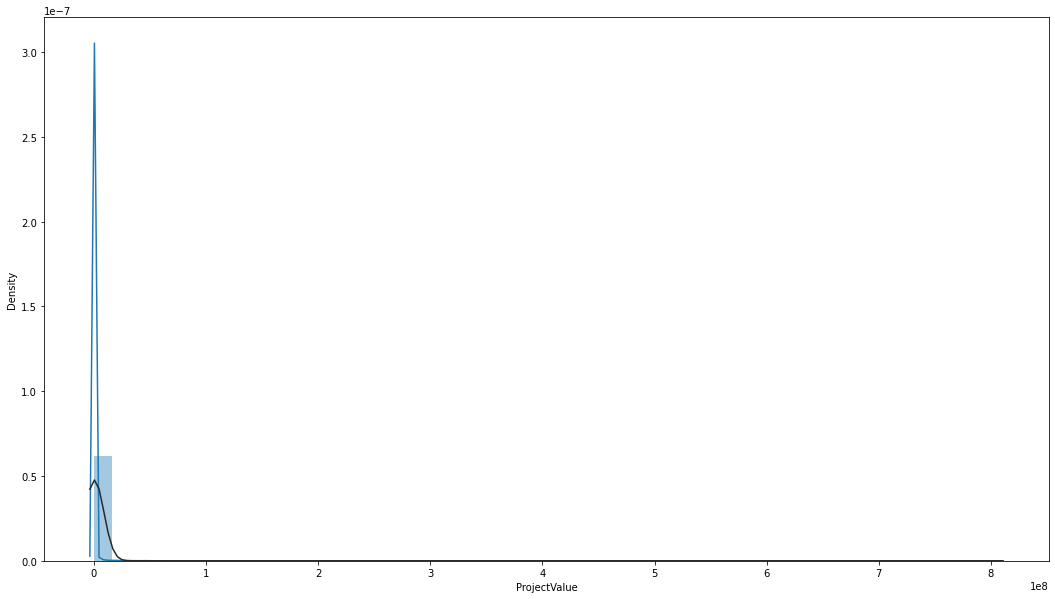

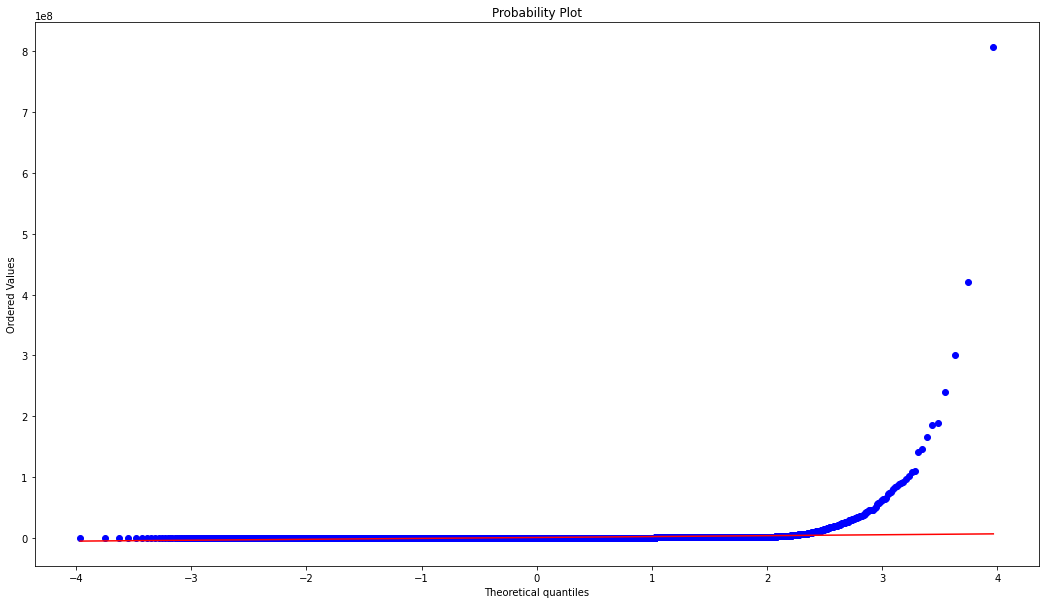

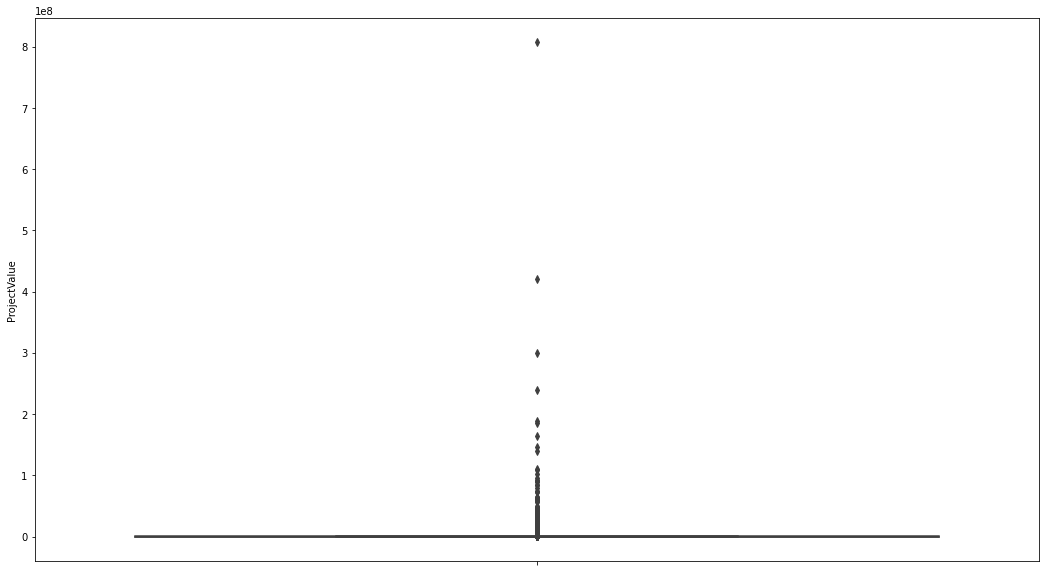

In [36]:
check_distribution(permits_df,'ProjectValue')

There are a large number of permits that have a value of zero. These will be considered errors, and thus removed from the analysis.

In [37]:
#Count how many zero values there are in project value

permits_df[permits_df.ProjectValue == 0].shape[0]

3008

In [38]:
#Remove permits with 0 project value

permits_df = permits_df[permits_df.ProjectValue != 0]
permits_df[permits_df.ProjectValue == 0].shape[0]

0

Null hypothesis of normality is rejected.


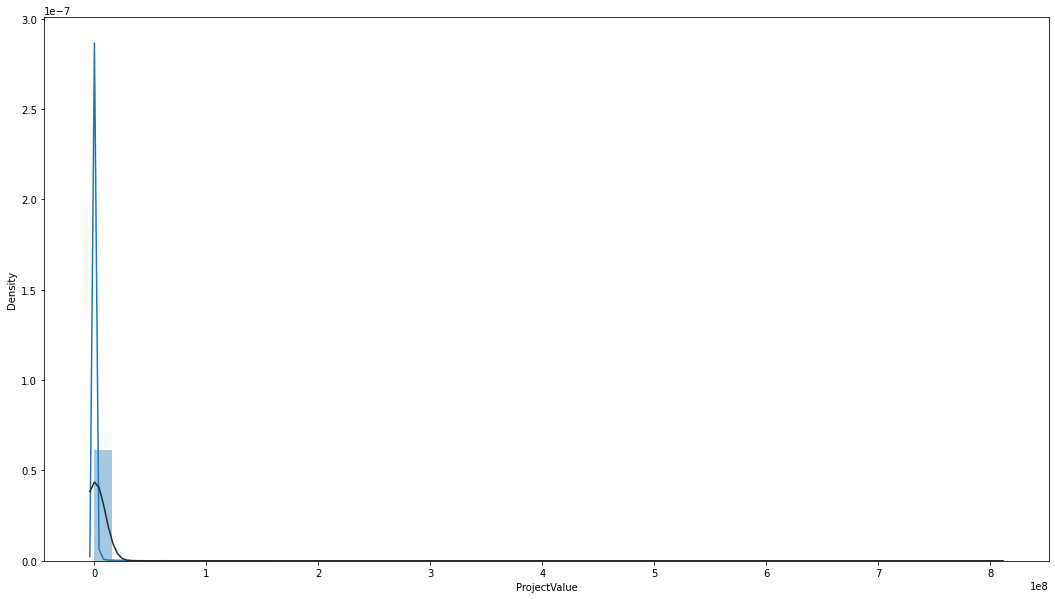

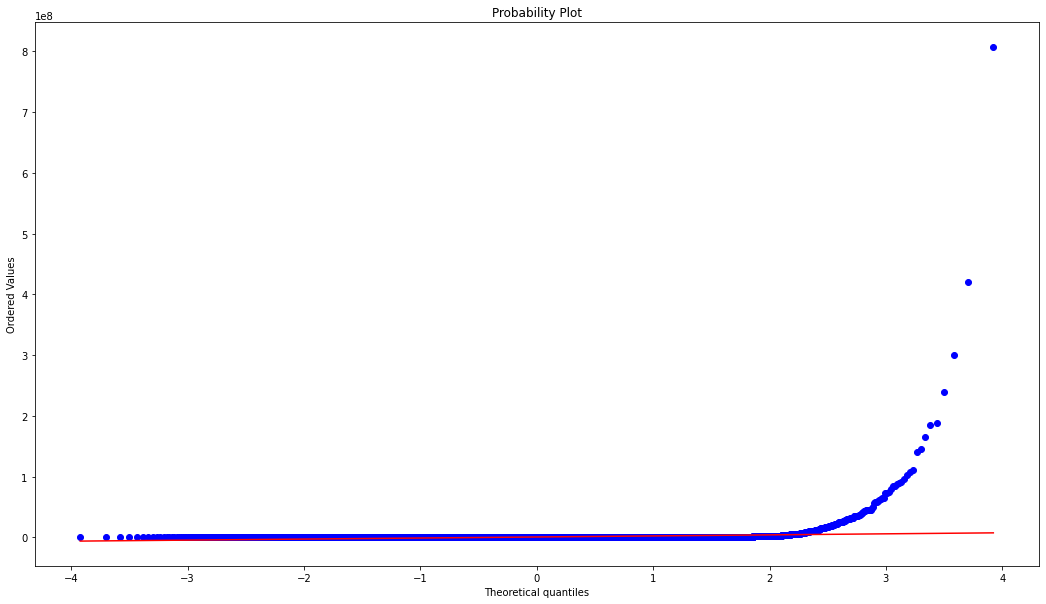

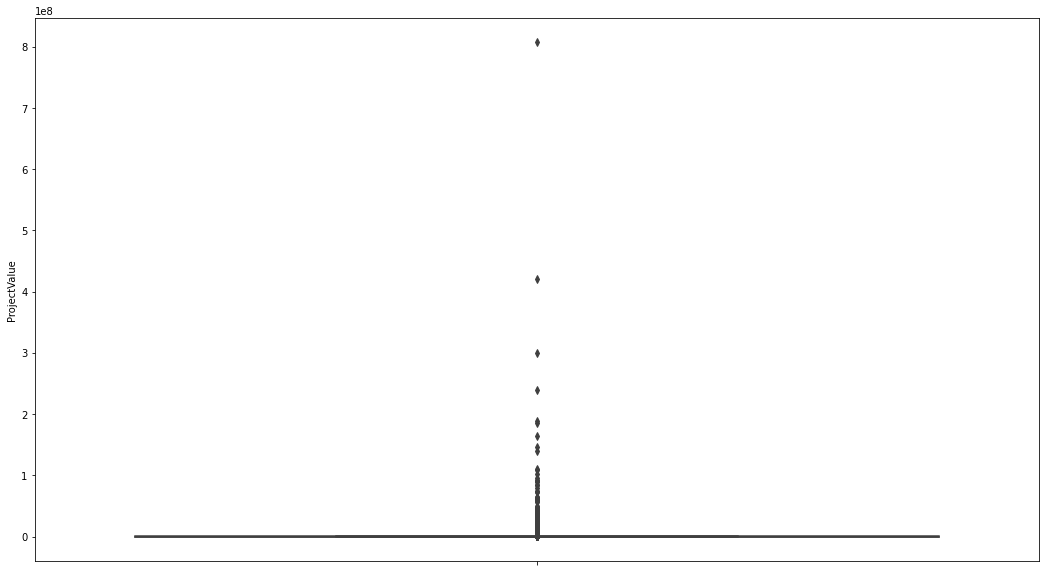

In [39]:
#Recheck the distribution after removing the permits with zero project value
check_distribution(permits_df,'ProjectValue')

In [40]:
permits_df.ProjectValue.min()

1.0

In [44]:
print(permits_df.ProjectValue.quantile(0.25))
print(permits_df.ProjectValue.quantile(0.5))
print(permits_df.ProjectValue.quantile(0.75))
print(permits_df.ProjectValue.quantile(0.99))

15000.0
80000.0
251500.0
8908775.369999852


Based on the probability plot, it appears there are a large number of permits with a single dollar value. In reality these are probably an error, and should be removed from the analysis. It also appears that there are a couple permits that are of an extreme value. With this in mind, I will remove values that are outside of 3 standard deviations.

In [41]:
#Removes values outside of 3 standard deviations

upper = permits_df.ProjectValue.mean() + 0.5 * permits_df.ProjectValue.std()
lower = permits_df.ProjectValue.mean() - 0.5 * permits_df.ProjectValue.std()

permits_df = permits_df[(permits_df.ProjectValue < upper)&(permits_df.ProjectValue > lower)]

In [42]:
permits_df.ProjectValue.min()

1.0

Null hypothesis of normality is rejected.


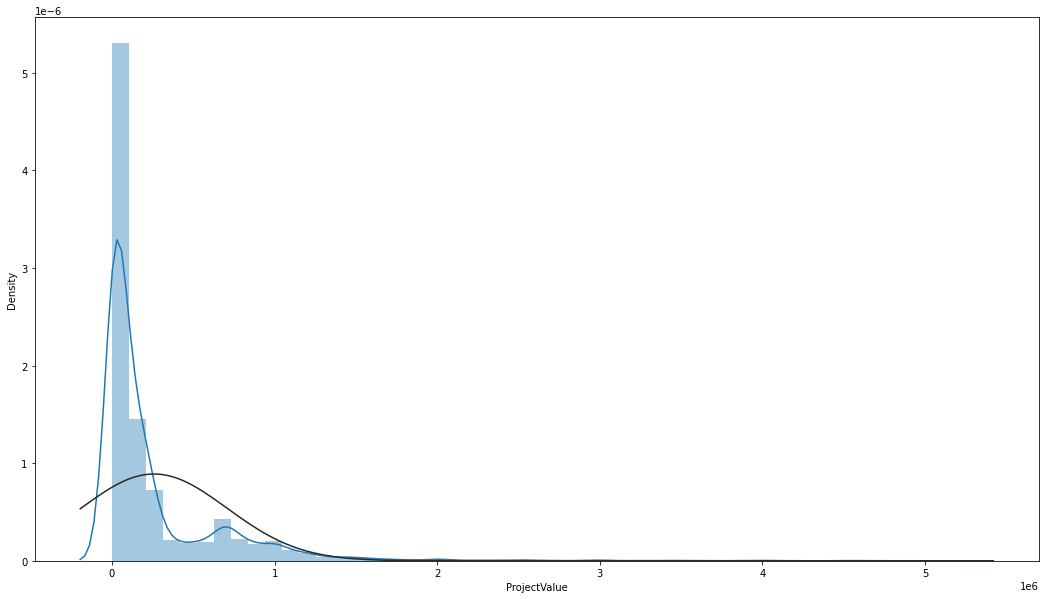

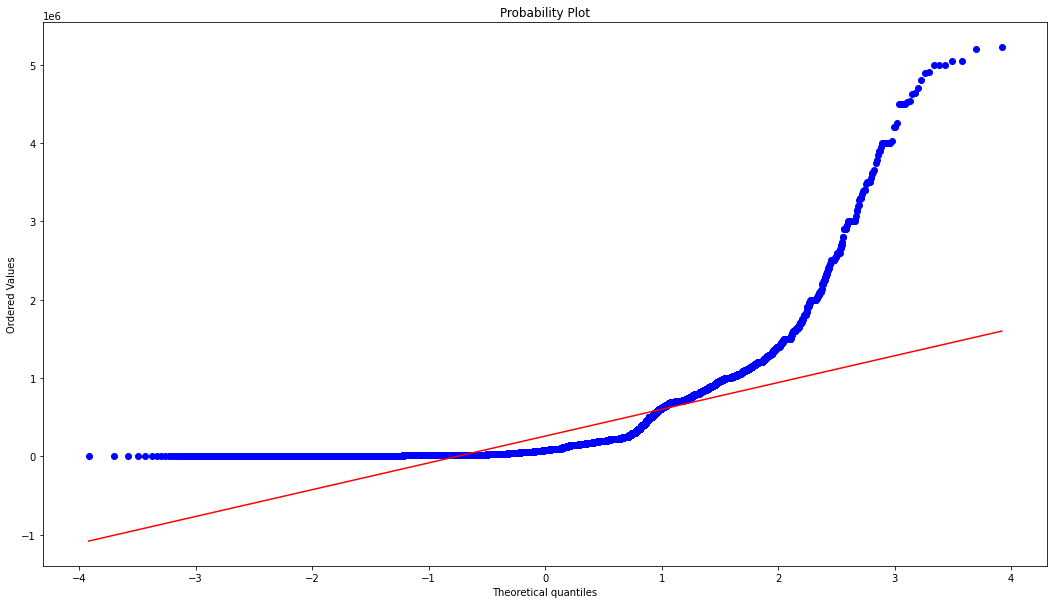

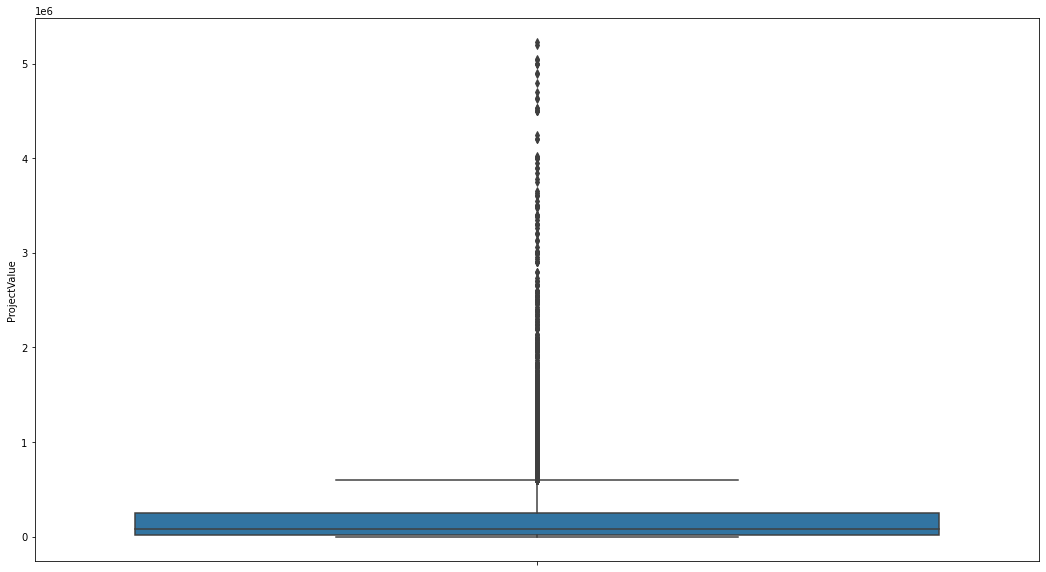

In [43]:
check_distribution(permits_df,'ProjectValue')

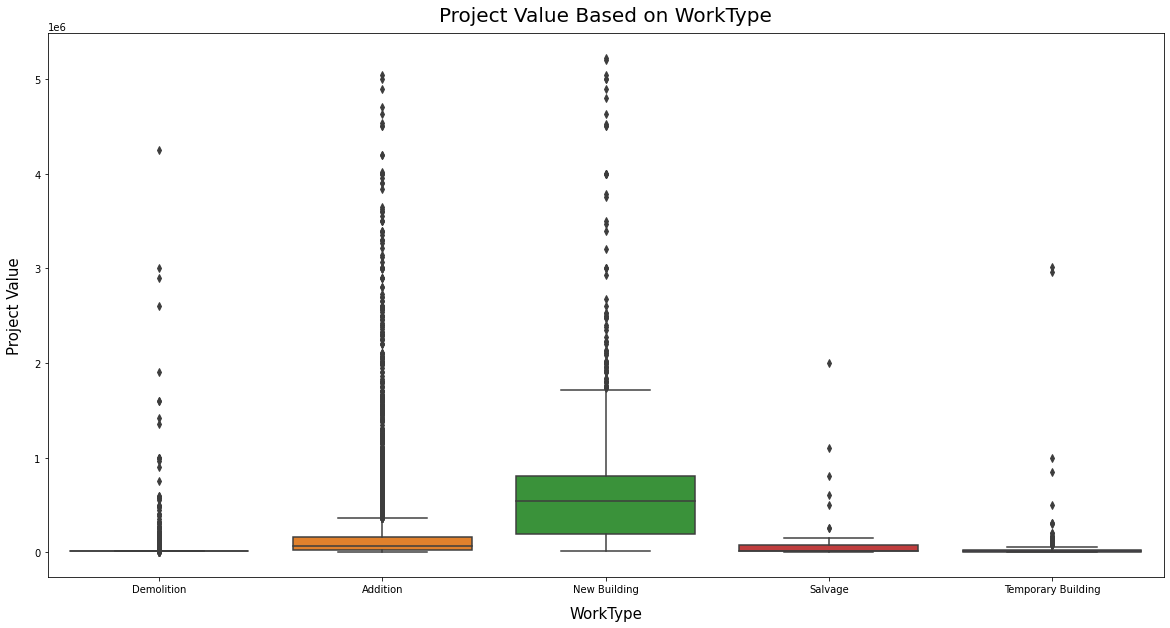

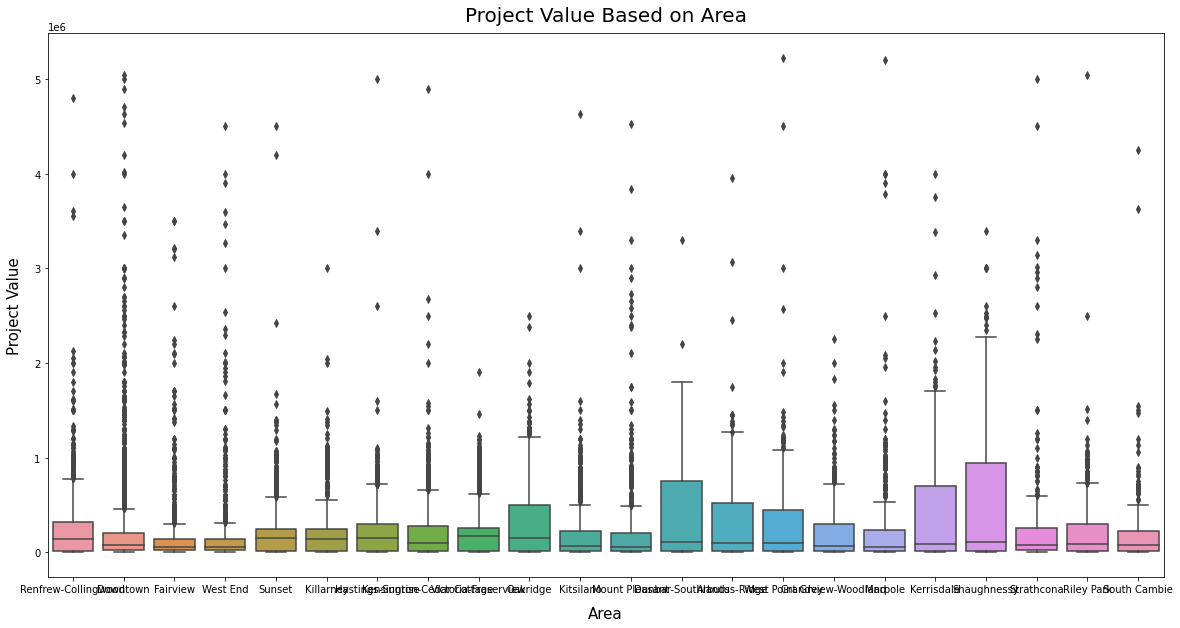

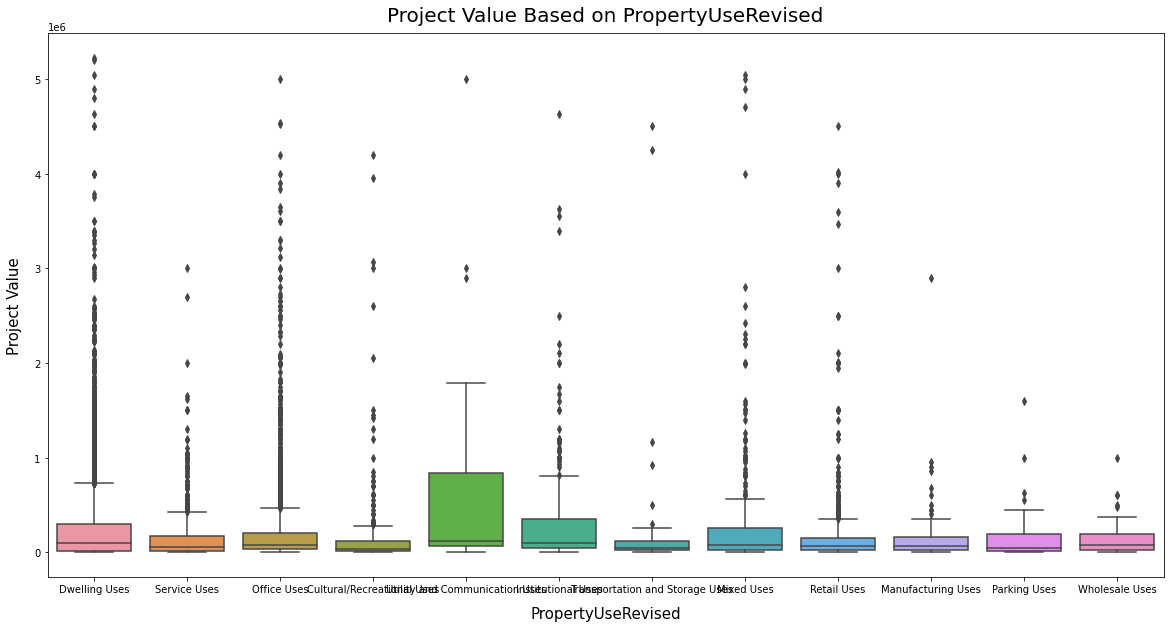

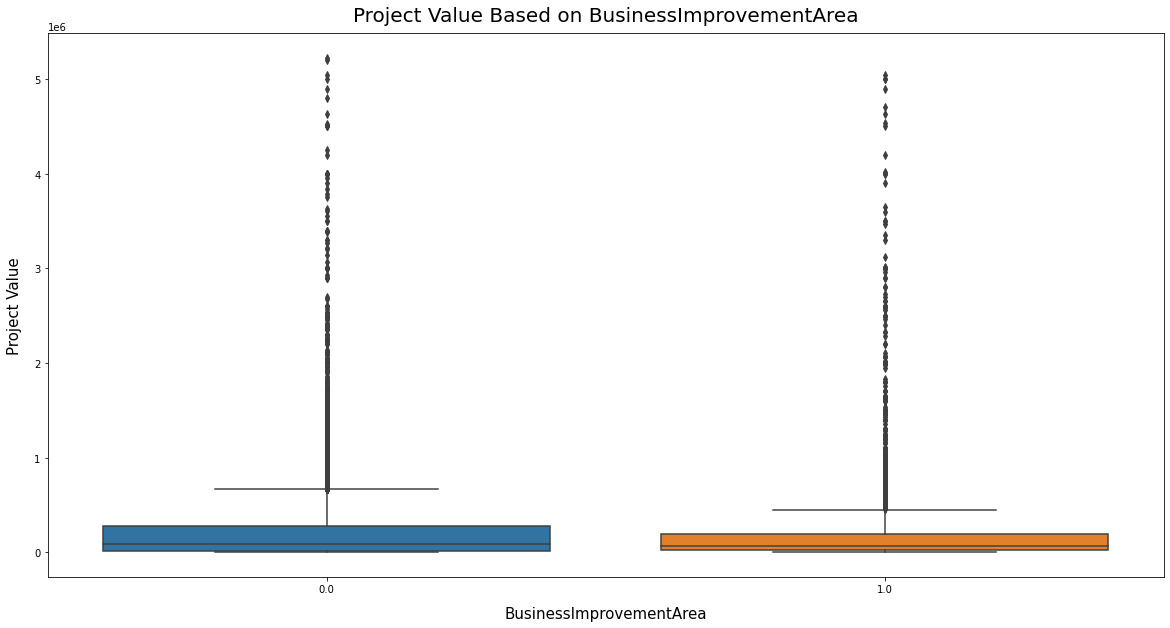

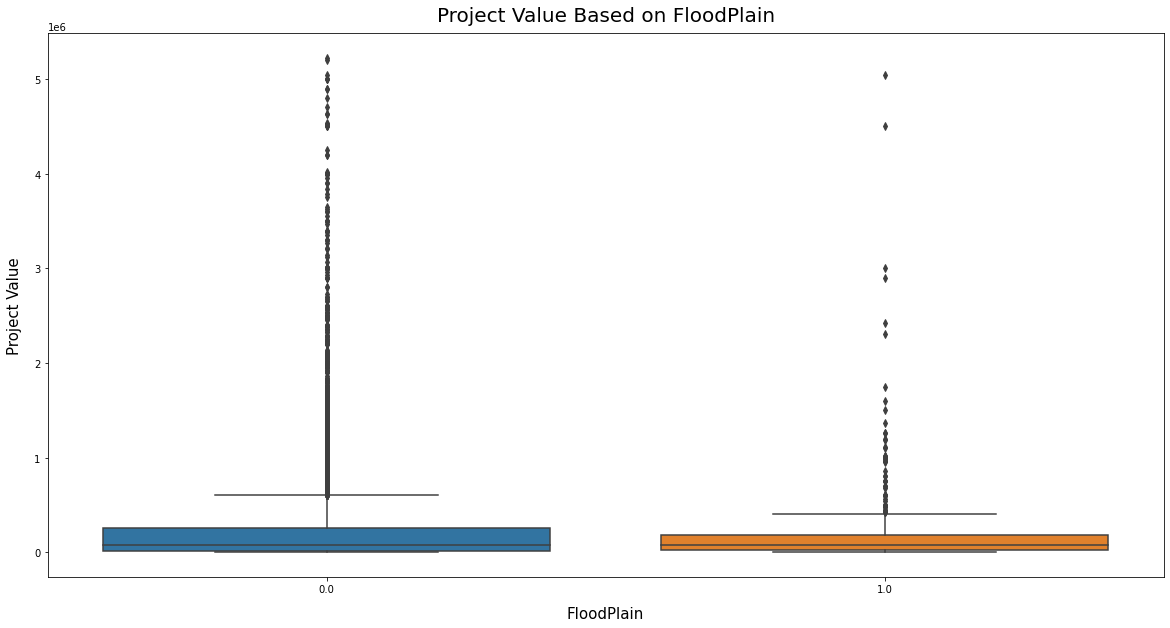

In [44]:
#Box plot for categorical features

for col in cat_cols:
    plt.figure(figsize=(20,10))
    sns.boxplot(x= col, y= 'ProjectValue', data=permits_df)
    plt.xlabel(f"{col}", fontsize= 15, labelpad =12)
    plt.ylabel("Project Value", fontsize= 15, labelpad =12)
    plt.title(f"Project Value Based on {col}", fontsize=20, pad= 12);

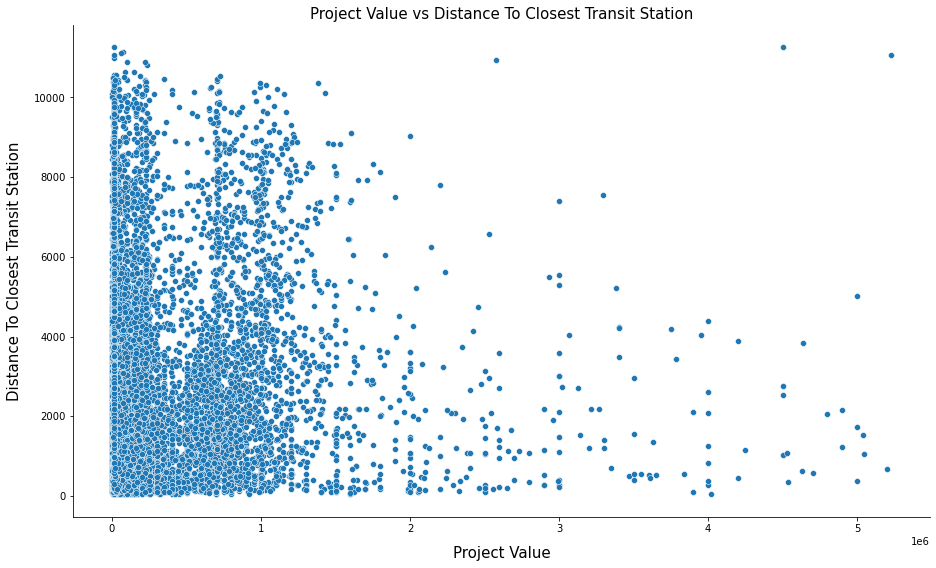

In [45]:
g = sns.relplot(x='ProjectValue', y='DistanceToNearestTransitStation', data=permits_df)
g.fig.set_size_inches(15,8)
plt.ylabel('Distance To Closest Transit Station', fontsize= 15, labelpad = 12)
plt.xlabel('Project Value', fontsize= 15, labelpad = 12)
plt.title('Project Value vs Distance To Closest Transit Station', fontsize= 15);